In [42]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('drive/My Drive')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [43]:
cd 'SoftwareDesign' 


[Errno 2] No such file or directory: 'SoftwareDesign'
/content/drive/My Drive/SoftwareDesign


In [44]:
os.listdir()

['IndoorData.json', 'assigment4.ipynb', 'OutdoorData.json']

In [45]:
import json
filename_in= 'IndoorData.json'
filename_out= 'OutdoorData.json'

with open(filename_in, 'r') as f:
    data_dict_in = json.load(f)

with open(filename_out, 'r') as f:
    data_dict_out = json.load(f)

print(data_dict_in)
print(data_dict_out)

data_in = data_dict_in.get('results')
data_out = data_dict_out.get('results')

print(data_in)
print(data_out)

{'results': [{'humidity': 41.400002, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:50:45'}, {'humidity': 41.400002, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:50:53'}, {'humidity': 41.5, 'temperatur': 29.1, 'timestamp': '2020-03-03 13:51:02'}, {'humidity': 41.599998, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:51:11'}, {'humidity': 41.599998, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:51:19'}, {'humidity': 10.0, 'temperatur': 20.0, 'timestamp': '2020-03-03 13:51:20'}, {'humidity': 41.299999, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:51:28'}, {'humidity': 41.5, 'temperatur': 29.299999, 'timestamp': '2020-03-03 13:51:37'}, {'humidity': 41.299999, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:51:45'}, {'humidity': 41.400002, 'temperatur': 29.299999, 'timestamp': '2020-03-03 13:51:54'}, {'humidity': 41.299999, 'temperatur': 29.200001, 'timestamp': '2020-03-03 13:52:03'}, {'humidity': 41.200001, 'temperatur': 29.200001, 'timestamp': '202

In [58]:
import random
data_set = list()
data_hum = list()

for d in data_in:
  data_set.append([d.get('temperatur'),d.get('humidity'),0])

for d in data_out:
  data_set.append([d.get('temperatur'),d.get('humidity'),1]) 

print(data_set)
print(len(data_set))

random.shuffle(data_set)
print(data_set)
print(len(data_set))

valid_set = data_set[(len(data_set) // 10) * 8:]
train_set = data_set[:(len(data_set) // 10) * 8]

print(valid_set)
print(len(valid_set))
print(train_set)
print(len(train_set))

[[29.200001, 41.400002, 0], [29.200001, 41.400002, 0], [29.1, 41.5, 0], [29.200001, 41.599998, 0], [29.200001, 41.599998, 0], [20.0, 10.0, 0], [29.200001, 41.299999, 0], [29.299999, 41.5, 0], [29.200001, 41.299999, 0], [29.299999, 41.400002, 0], [29.200001, 41.299999, 0], [29.200001, 41.200001, 0], [29.200001, 41.200001, 0], [29.200001, 41.299999, 0], [29.200001, 41.299999, 0], [29.200001, 41.200001, 0], [29.200001, 41.299999, 0], [29.1, 41.200001, 0], [29.200001, 41.299999, 0], [29.1, 41.299999, 0], [29.1, 41.400002, 0], [29.200001, 41.5, 0], [29.200001, 41.400002, 0], [29.200001, 41.400002, 0], [29.200001, 41.099998, 0], [29.200001, 41.200001, 0], [29.1, 41.400002, 0], [29.200001, 41.400002, 0], [29.1, 41.099998, 0], [29.1, 41.200001, 0], [29.1, 41.400002, 0], [29.1, 41.400002, 0], [29.1, 41.400002, 0], [29.200001, 41.5, 0], [29.200001, 41.5, 0], [29.200001, 41.5, 0], [29.1, 41.299999, 0], [29.1, 41.400002, 0], [29.1, 41.599998, 0], [29.1, 41.700001, 0], [29.1, 41.799999, 0], [29.1, 

In [82]:
import numpy as np 
x = list()
y = list()
x_test = list()
y_test = list()

for sample in train_set:
  x.append([sample[0],sample[1]])
  y.append(sample[2])

for sample in valid_set:
  x_test.append([sample[0],sample[1]])
  y_test.append(sample[2])

x = np.array(x)
y = np.array(y)

x_test = np.array(x)
y_test = np.array(y)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(624, 2)
(624,)
(624, 2)
(624,)


In [97]:
%tensorflow_version 2.x
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=2))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

one_hot_labels = tf.keras.utils.to_categorical(y, num_classes=2)
history = model.fit(x, one_hot_labels, epochs=250, batch_size=8)



Train on 624 samples
Epoch 1/250
624/624 [==============================] - 0s 632us/sample - loss: 3.8711 - accuracy: 0.5120
Epoch 2/250
624/624 [==============================] - 0s 194us/sample - loss: 0.5991 - accuracy: 0.6546
Epoch 3/250
624/624 [==============================] - 0s 195us/sample - loss: 0.5848 - accuracy: 0.6466
Epoch 4/250
624/624 [==============================] - 0s 196us/sample - loss: 0.5521 - accuracy: 0.7212
Epoch 5/250
624/624 [==============================] - 0s 188us/sample - loss: 0.5320 - accuracy: 0.7188
Epoch 6/250
624/624 [==============================] - 0s 191us/sample - loss: 0.5140 - accuracy: 0.7356
Epoch 7/250
624/624 [==============================] - 0s 197us/sample - loss: 0.5017 - accuracy: 0.7660
Epoch 8/250
624/624 [==============================] - 0s 215us/sample - loss: 0.4908 - accuracy: 0.7756
Epoch 9/250
624/624 [==============================] - 0s 184us/sample - loss: 0.4930 - accuracy: 0.7676
Epoch 10/250
624/624 [============

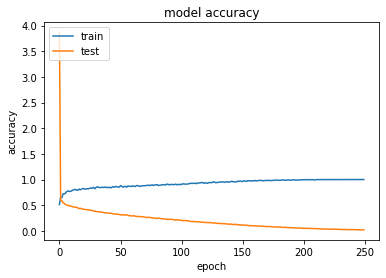

In [98]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']

loss = history.history['loss']

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
one_hot_labels_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
score = model.evaluate(x_test, one_hot_labels_test)

624/624 [==============================] - 0s 146us/sample - loss: 0.0149 - accuracy: 1.0000


In [0]:
s